**Title**: Preventing Overfitting in Simple Neural Networks for Premier League Soccer Match Prediction

<center><img src="images/premier_league_champions.png" width="800px" height="600px"></center>

**Summary:**

In this study, I explored various strategies to mitigate overfitting in Simple Neural Networks for predicting the winners of Premier League soccer matches in 2025. In the analysis, I have used a dataset gathered from [football-data.co.uk](https://football-data.co.uk/downloadm.php) which includes seasons from 2010 to 2024. The focus is on dropout, L1, and L2 regularization techniques to address overfitting and improve model generalization.



---



**Introduction:**

<center><img src="images/overfitting.png" alt="overfitting_image"></center>

Overfitting is a common problem in machine learning models, where the model performs well on the training data but fails to generalize to new, unseen data. In the context of neural networks, overfitting often occurs when the model is too complex relative to the amount of training data available. Dropout L1 and L2 regularization are some widely used techniques to prevent overfitting by introducing constraints on the model's parameters.

---



**Methodology:**

To investigate the effectiveness of dropout, L1 and L2 regularization in mitigating overfitting, I conducted a series of experiments using the Premier League soccer match dataset which includes seasons from 2010 to 2024. I trained a Simple Neural Network with two hidden layers and explored different dropout rates and regularization strengths to find the optimal configuration.

---



**Implementation**:

The network architecture included an input layer, two hidden layers with Sigmoid activation, and an output layer with softmax activation. I used the Adam optimizer and categorical cross-entropy loss function for training.

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, regularizers
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import normalize
import matplotlib.pyplot as plt

**Loading and Preprocessing the Data**

In [2]:
dataframes = []
start_season = 2010
end_season = 2024

while start_season < end_season:
    # Construct the file path for each season
    path = 'dataset/all-euro-data-' + str(start_season) + '-' + str(start_season + 1) + '.xlsx'

    # Load the data for the current season and append it to the list
    dataframes.append(pd.read_excel(path))

    # Move to the next season
    start_season += 1

# Merge all dataframes into a single dataframe
dataset = pd.concat(dataframes, ignore_index=True)

# Removing unwanted features
dataset = dataset.drop(dataset.columns[dataset.columns.get_loc('AR') + 1:], axis=1)
dataset = dataset.drop(['Div', 'Date', 'FTHG', 'FTAG', 'HTHG', 'HTAG'], axis=1)

# Display the first few rows of the merged dataset
print(len(dataset))
print(dataset.head())


5287
      HomeTeam    AwayTeam FTR HTR        Referee  HS  AS  HST  AST  HF  AF  \
0  Aston Villa    West Ham   H   H         M Dean  23  12   11    2  15  15   
1    Blackburn     Everton   H   H         P Dowd   7  17    2   12  19  14   
2       Bolton      Fulham   D   D      S Attwell  13  12    9    7  12  13   
3      Chelsea   West Brom   H   H  M Clattenburg  18  10   13    4  10  10   
4   Sunderland  Birmingham   D   H       A Taylor   6  13    2    7  13  10   

   HC  AC  HY  AY  HR  AR  
0  16   7   1   2   0   0  
1   1   3   2   1   0   0  
2   4   8   1   3   0   0  
3   3   1   1   0   0   0  
4   3   6   3   3   1   0  


**Encoding the Target Variable and Features**

In [3]:
# Encode the target variable 'FTR'
label_encoder = LabelEncoder()
dataset['FTR'] = label_encoder.fit_transform(dataset['FTR'])

# Perform one-hot encoding for the target variable
labels = to_categorical(dataset['FTR'])

# Encode categorical columns
label_encoders = {}
for column in dataset.select_dtypes(include=['object']):
    label_encoders[column] = LabelEncoder()
    dataset[column] = label_encoders[column].fit_transform(dataset[column])

# Remove the output label from the input data
X_data = dataset.drop('FTR', axis=1)
Y_data = dataset['FTR']

# Display the first few rows of the merged dataset
print(X_data.head())

   HomeTeam  AwayTeam  HTR  Referee  HS  AS  HST  AST  HF  AF  HC  AC  HY  AY  \
0         1        37    2       23  23  12   11    2  15  15  16   7   1   2   
1         3        13    2       31   7  17    2   12  19  14   1   3   2   1   
2         5        14    1       39  13  12    9    7  12  13   4   8   1   3   
3        11        36    2       22  18  10   13    4  10  10   3   1   1   0   
4        32         2    2        3   6  13    2    7  13  10   3   6   3   3   

   HR  AR  
0   0   0  
1   0   0  
2   0   0  
3   0   0  
4   1   0  


**Data Splitting and Normalization**

In [4]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_data, Y_data, test_size=0.2, random_state=40)

# Normalize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

**First Model Architecture and Training**

In [5]:
# Define the model architecture
model_1 = keras.Sequential([
    layers.Dense(25, activation='sigmoid', input_shape=[16]),
    layers.Dense(30, activation='sigmoid'),
    layers.Dense(3, activation='softmax')
])

# Specify the optimizer
optimizer = Adam(learning_rate=0.0005)

# Compile the model
model_1.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
history_1 = model_1.fit(X_train, y_train, epochs=350, batch_size=10, validation_data=(X_test, y_test))

Epoch 1/350


c:\Users\surry\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


423/423 ━━━━━━━━━━━━━━━━━━━━ 1s 944us/step - accuracy: 0.4646 - loss: 1.0425 - val_accuracy: 0.5482 - val_loss: 0.9870
Epoch 2/350
423/423 ━━━━━━━━━━━━━━━━━━━━ 0s 703us/step - accuracy: 0.6004 - loss: 0.9358 - val_accuracy: 0.6125 - val_loss: 0.8871
Epoch 3/350
423/423 ━━━━━━━━━━━━━━━━━━━━ 0s 718us/step - accuracy: 0.6577 - loss: 0.8263 - val_accuracy: 0.6238 - val_loss: 0.8223
Epoch 4/350
423/423 ━━━━━━━━━━━━━━━━━━━━ 0s 701us/step - accuracy: 0.6490 - loss: 0.7878 - val_accuracy: 0.6248 - val_loss: 0.8080
Epoch 5/350
423/423 ━━━━━━━━━━━━━━━━━━━━ 0s 707us/step - accuracy: 0.6544 - loss: 0.7591 - val_accuracy: 0.6229 - val_loss: 0.8008
Epoch 6/350
423/423 ━━━━━━━━━━━━━━━━━━━━ 0s 707us/step - accuracy: 0.6595 - loss: 0.7561 - val_accuracy: 0.6276 - val_loss: 0.7987
Epoch 7/350
423/423 ━━━━━━━━━━━━━━━━━━━━ 0s 672us/step - accuracy: 0.6406 - loss: 0.7689 - val_accuracy: 0.6276 - val_loss: 0.8036
Epoch 8/350
423/423 ━━━━━━━━━━━━━━━━━━━━ 0s 682us/step - accuracy: 0.6569 - loss: 0.7645 - val_

**Graph indicating the Overfitting Problem**

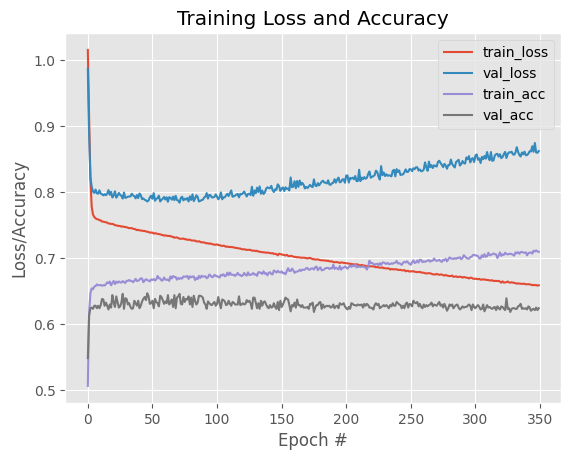

In [6]:
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, 350), history_1.history["loss"], label="train_loss")
plt.plot(np.arange(0, 350), history_1.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, 350), history_1.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, 350), history_1.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()

**Second Model Architecture with Dropout**

<center><img src="images/dropout.png" alt="dropout_image"/></center>

In [7]:
# Define the model architecture with dropout
model_2 = keras.Sequential([
    layers.Dense(25, activation='sigmoid', input_shape=[16]),
    layers.Dropout(0.2),  # Dropout layer with 20% dropout rate
    layers.Dense(30, activation='sigmoid'),
    layers.Dropout(0.2),  # Dropout layer with 20% dropout rate
    layers.Dense(3, activation='softmax')
])

# Specify the optimizer
optimizer = Adam(learning_rate=0.0005)

# Compile the model
model_2.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
history_2 = model_2.fit(X_train, y_train, epochs=350, batch_size=10, validation_data=(X_test, y_test))

Epoch 1/350


c:\Users\surry\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


423/423 ━━━━━━━━━━━━━━━━━━━━ 1s 951us/step - accuracy: 0.3718 - loss: 1.1837 - val_accuracy: 0.5302 - val_loss: 1.0010
Epoch 2/350
423/423 ━━━━━━━━━━━━━━━━━━━━ 0s 778us/step - accuracy: 0.5491 - loss: 0.9864 - val_accuracy: 0.5974 - val_loss: 0.9125
Epoch 3/350
423/423 ━━━━━━━━━━━━━━━━━━━━ 0s 735us/step - accuracy: 0.6022 - loss: 0.9021 - val_accuracy: 0.6096 - val_loss: 0.8479
Epoch 4/350
423/423 ━━━━━━━━━━━━━━━━━━━━ 0s 747us/step - accuracy: 0.6321 - loss: 0.8344 - val_accuracy: 0.6191 - val_loss: 0.8167
Epoch 5/350
423/423 ━━━━━━━━━━━━━━━━━━━━ 0s 768us/step - accuracy: 0.6317 - loss: 0.8303 - val_accuracy: 0.6219 - val_loss: 0.8078
Epoch 6/350
423/423 ━━━━━━━━━━━━━━━━━━━━ 0s 784us/step - accuracy: 0.6362 - loss: 0.8246 - val_accuracy: 0.6238 - val_loss: 0.8086
Epoch 7/350
423/423 ━━━━━━━━━━━━━━━━━━━━ 0s 745us/step - accuracy: 0.6469 - loss: 0.7996 - val_accuracy: 0.6219 - val_loss: 0.8049
Epoch 8/350
423/423 ━━━━━━━━━━━━━━━━━━━━ 0s 756us/step - accuracy: 0.6389 - loss: 0.8046 - val_

**Third Model Architecture with L1 Regularization**

<center><img src="images/l1_regularization.png" alt="l1_regularization_image"/><center>

In [8]:
# Define the regularization strength
l1_strength = 0.01

# Define the model architecture with L1 regularization
model_3 = keras.Sequential([
    layers.Dense(25, activation='sigmoid', input_shape=[16], kernel_regularizer=regularizers.l1(l1_strength)),
    layers.Dense(30, activation='sigmoid', kernel_regularizer=regularizers.l1(l1_strength)),
    layers.Dense(3, activation='softmax', kernel_regularizer=regularizers.l1(l1_strength))
])

# Specify the optimizer
optimizer = Adam(learning_rate=0.0005)

# Compile the model
model_3.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
history_3 = model_3.fit(X_train, y_train, epochs=350, batch_size=10, validation_data=(X_test, y_test))

Epoch 1/350
423/423 ━━━━━━━━━━━━━━━━━━━━ 1s 938us/step - accuracy: 0.4235 - loss: 2.8462 - val_accuracy: 0.4263 - val_loss: 1.7492
Epoch 2/350
423/423 ━━━━━━━━━━━━━━━━━━━━ 0s 693us/step - accuracy: 0.4574 - loss: 1.5369 - val_accuracy: 0.4263 - val_loss: 1.2567
Epoch 3/350
423/423 ━━━━━━━━━━━━━━━━━━━━ 0s 687us/step - accuracy: 0.4675 - loss: 1.2147 - val_accuracy: 0.4263 - val_loss: 1.2174
Epoch 4/350
423/423 ━━━━━━━━━━━━━━━━━━━━ 0s 708us/step - accuracy: 0.4657 - loss: 1.1872 - val_accuracy: 0.4263 - val_loss: 1.1978
Epoch 5/350
423/423 ━━━━━━━━━━━━━━━━━━━━ 0s 697us/step - accuracy: 0.4651 - loss: 1.1665 - val_accuracy: 0.4263 - val_loss: 1.1787
Epoch 6/350
423/423 ━━━━━━━━━━━━━━━━━━━━ 0s 687us/step - accuracy: 0.4559 - loss: 1.1550 - val_accuracy: 0.4263 - val_loss: 1.1626
Epoch 7/350
423/423 ━━━━━━━━━━━━━━━━━━━━ 0s 679us/step - accuracy: 0.4606 - loss: 1.1377 - val_accuracy: 0.4263 - val_loss: 1.1477
Epoch 8/350
423/423 ━━━━━━━━━━━━━━━━━━━━ 0s 681us/step - accuracy: 0.4617 - loss: 1

**Fourth Model Architecture with L2 Regularization**


<center><img src="images/l2_regularization.png" alt="l2_regularization_image"/></center>

In [9]:
# Define the regularization strength
l2_strength = 0.01

# Define the model architecture with L2 regularization
model_4 = keras.Sequential([
    layers.Dense(25, activation='sigmoid', input_shape=[16], kernel_regularizer=regularizers.l2(l2_strength)),
    layers.Dense(30, activation='sigmoid', kernel_regularizer=regularizers.l2(l2_strength)),
    layers.Dense(3, activation='softmax', kernel_regularizer=regularizers.l2(l2_strength))
])

# Specify the optimizer
optimizer = Adam(learning_rate=0.0005)

# Compile the model
model_4.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
history_4 = model_4.fit(X_train, y_train, epochs=350, batch_size=10, validation_data=(X_test, y_test))

Epoch 1/350
423/423 ━━━━━━━━━━━━━━━━━━━━ 1s 923us/step - accuracy: 0.4554 - loss: 1.4918 - val_accuracy: 0.4263 - val_loss: 1.2631
Epoch 2/350
423/423 ━━━━━━━━━━━━━━━━━━━━ 0s 676us/step - accuracy: 0.4623 - loss: 1.2030 - val_accuracy: 0.5359 - val_loss: 1.1579
Epoch 3/350
423/423 ━━━━━━━━━━━━━━━━━━━━ 0s 681us/step - accuracy: 0.5050 - loss: 1.1224 - val_accuracy: 0.5624 - val_loss: 1.1084
Epoch 4/350
423/423 ━━━━━━━━━━━━━━━━━━━━ 0s 688us/step - accuracy: 0.5830 - loss: 1.0857 - val_accuracy: 0.5860 - val_loss: 1.0843
Epoch 5/350
423/423 ━━━━━━━━━━━━━━━━━━━━ 0s 689us/step - accuracy: 0.6396 - loss: 1.0384 - val_accuracy: 0.6059 - val_loss: 1.0636
Epoch 6/350
423/423 ━━━━━━━━━━━━━━━━━━━━ 0s 677us/step - accuracy: 0.6303 - loss: 1.0374 - val_accuracy: 0.6172 - val_loss: 1.0572
Epoch 7/350
423/423 ━━━━━━━━━━━━━━━━━━━━ 0s 695us/step - accuracy: 0.6531 - loss: 1.0223 - val_accuracy: 0.6153 - val_loss: 1.0463
Epoch 8/350
423/423 ━━━━━━━━━━━━━━━━━━━━ 0s 680us/step - accuracy: 0.6473 - loss: 1

**Fifth Model Architecture with L2 Regularization and 20% Dropout**

In [10]:
# Define the regularization strength
l2_strength = 0.01

# Define the model architecture with L2 regularization and dropout
model_5 = keras.Sequential([
    layers.Dense(25, activation='sigmoid', input_shape=[16], kernel_regularizer=regularizers.l2(l2_strength)),
    layers.Dropout(0.2),  # Dropout layer with 20% dropout rate
    layers.Dense(30, activation='sigmoid', kernel_regularizer=regularizers.l2(l2_strength)),
    layers.Dropout(0.2),  # Dropout layer with 20% dropout rate
    layers.Dense(3, activation='softmax', kernel_regularizer=regularizers.l2(l2_strength))
])

# Specify the optimizer
optimizer = Adam(learning_rate=0.0005)

# Compile the model
model_5.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
history_5 = model_5.fit(X_train, y_train, epochs=350, batch_size=10, validation_data=(X_test, y_test))

Epoch 1/350
423/423 ━━━━━━━━━━━━━━━━━━━━ 1s 942us/step - accuracy: 0.4257 - loss: 1.5407 - val_accuracy: 0.4263 - val_loss: 1.2794
Epoch 2/350
423/423 ━━━━━━━━━━━━━━━━━━━━ 0s 699us/step - accuracy: 0.4472 - loss: 1.2456 - val_accuracy: 0.4263 - val_loss: 1.1617
Epoch 3/350
423/423 ━━━━━━━━━━━━━━━━━━━━ 0s 732us/step - accuracy: 0.4633 - loss: 1.1536 - val_accuracy: 0.4395 - val_loss: 1.1200
Epoch 4/350
423/423 ━━━━━━━━━━━━━━━━━━━━ 0s 696us/step - accuracy: 0.4993 - loss: 1.1117 - val_accuracy: 0.5898 - val_loss: 1.1002
Epoch 5/350
423/423 ━━━━━━━━━━━━━━━━━━━━ 0s 696us/step - accuracy: 0.5373 - loss: 1.0892 - val_accuracy: 0.5841 - val_loss: 1.0845
Epoch 6/350
423/423 ━━━━━━━━━━━━━━━━━━━━ 0s 715us/step - accuracy: 0.5638 - loss: 1.0726 - val_accuracy: 0.5482 - val_loss: 1.0742
Epoch 7/350
423/423 ━━━━━━━━━━━━━━━━━━━━ 0s 707us/step - accuracy: 0.5644 - loss: 1.0630 - val_accuracy: 0.6106 - val_loss: 1.0622
Epoch 8/350
423/423 ━━━━━━━━━━━━━━━━━━━━ 0s 713us/step - accuracy: 0.5780 - loss: 1

**Results:**




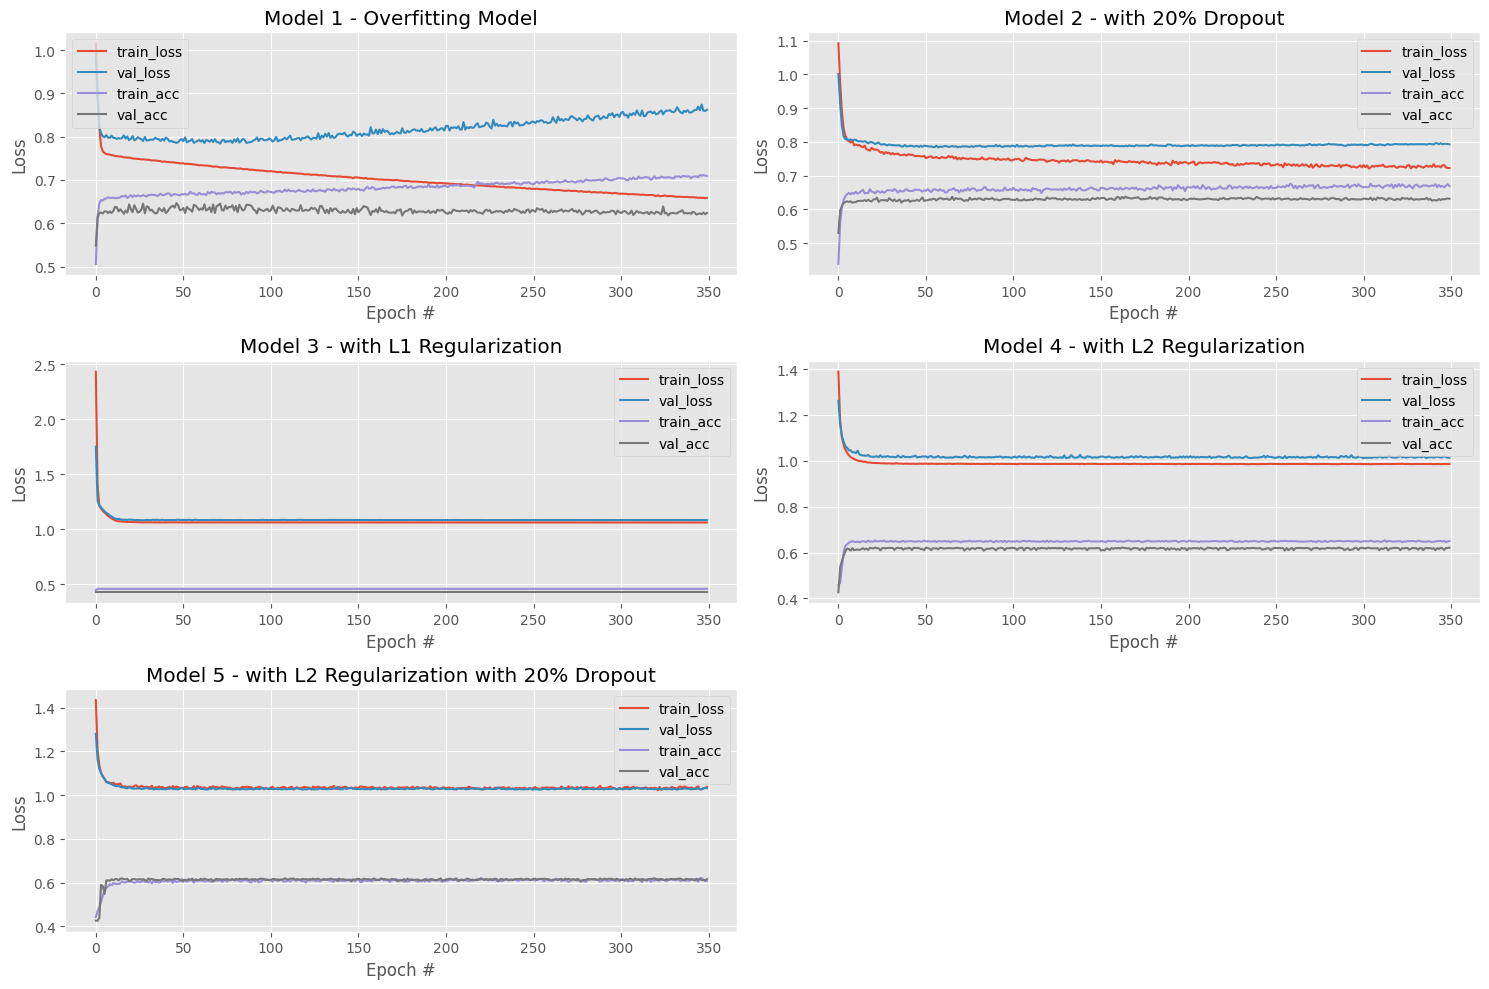

In [11]:
def plotGraph(axs, x, y, title, history):
  axs[x, y].plot(np.arange(0, 350), history.history["loss"], label="train_loss")
  axs[x, y].plot(np.arange(0, 350), history.history["val_loss"], label="val_loss")
  axs[x, y].plot(np.arange(0, 350), history.history["accuracy"], label="train_acc")
  axs[x, y].plot(np.arange(0, 350), history.history["val_accuracy"], label="val_acc")
  axs[x, y].set_title(title)
  axs[x, y].set_xlabel("Epoch #")
  axs[x, y].set_ylabel("Loss")
  axs[x, y].legend()

plt.style.use("ggplot")
fig, axs = plt.subplots(3, 2, figsize=(15, 10))

# Plotting for model_1
plotGraph(axs, 0, 0, "Model 1 - Overfitting Model", history_1)

# Plotting for model_2
plotGraph(axs, 0, 1, "Model 2 - with 20% Dropout", history_2)

# Plotting for model_3
plotGraph(axs, 1, 0, "Model 3 - with L1 Regularization", history_3)

# Plotting for model_4
plotGraph(axs, 1, 1, "Model 4 - with L2 Regularization", history_4)

# Plotting for model_5
plotGraph(axs, 2, 0, "Model 5 - with L2 Regularization with 20% Dropout", history_5)

# Hiding the last subplot
axs[2, 1].axis('off')

plt.tight_layout()
plt.savefig("comparison.png")
plt.show()



My experiments revealed that using a dropout rate of 20% helped alleviate overfitting to some extent, although the model still exhibited signs of overfitting. In contrast, applying L2 regularization significantly improved the model's performance and eliminated overfitting entirely. However, using L1 regularization led to underfitting, indicating that it was too severe a penalty for the model's weights.

---



**Conclusion:**

In conclusion, our study highlights the importance of employing effective regularization techniques, such as dropout and L2 regularization, to mitigate overfitting in Simple Neural Networks. Although the accuracy I could achieve in my experiments was around 60%, I was able to generalize the model to unseen data.

---

